In [1]:
NAME = '2-1-A'

____


<div dir=rtl>
    ۱. ب)
در صورتی که فرد بهبود یافته بعد از بهبود مانند یک فردی که به بیماری مبتلا نشده است باشد، نپزب را رسم کنید.
</div>


نرخ: $n_{s} * \mu $

_______________

In [2]:
import numpy as np
import random
from math import sqrt
import nepzeb

In [3]:
n = 1000

mu = 1/4 #mean not rate

t = 0

ni = n//2

T = 30

ar = sorted(np.random.exponential(mu,10000))[200]
br = sorted(np.random.exponential(mu,10000))[5000]

pr = 0.9


ns = ni
nh = n - ns
nd = 0
nu = 0
nr = 0
nu = 0

In [4]:
ar,br

(0.005164098289568018, 0.17395959545312706)

__________


<div dir=rtl>
    لیستی به تعداد نفرات جامعه ایجاد می‌کنیم که به تصادف افراد سالم و مریض وضعیت آن‌ها مشخص شده است.
</div>


In [5]:
society = ['sick' for i in range(ns)] + ['healthy' for j in range(nh)]
random.shuffle(society)


<div dir=rtl>
    لیست خالی برای نگهداری زمان پایان هر فردی که در نقاهت به سر می‌برد ایجاد می‌کنیم.
</div>


In [6]:
tu_list = []


<div dir=rtl>
    لیستی به تعداد افراد جامعه صفر تولید می‌کنیم، اگر فردی یکبار بهبود پیدا کرد خانه متعلق به اون به ۱ تغییر می‌کند.
</div>


In [7]:
recoverd = np.zeros(n)

______


<div dir=rtl>
    توابعی تعریف می‌کنیم که خروجی آن زمان اولین فرد سالمی که مریض می‌شود و شماره آن درون لیست به این معنی که چه کسی و چه زمانی مریض می شود برای ما مهم است.
</div>


In [8]:
#return time and index of person who get sick

def NewCase_occur():
    
    fall_ill_chance = []
    for every_person in range(len(society)):
        
        
        if (society[every_person] == 'healthy'):
                   
            fall_ill_chance.append(np.random.exponential(ns * mu))

        #sick or dead
        else:
            fall_ill_chance.append(float('inf'))

    return(min(fall_ill_chance),fall_ill_chance.index(min(fall_ill_chance)))


In [9]:
def NewCase(tt, index):
    global t
    global ns
    global nh
    
    t += tt
    ns += 1
    nh -= 1
    
    society[index] = 'sick'


_______


<div dir=rtl>
    اتفاق دومی که در برای افراد ممکن است بی افتد بعد از زمانی بهبود یابند و یا فوت کنند، این بار هم مانند توابع بالا عمل می‌کنیم.
</div>


In [10]:
def tr_occur():
    
    v = []
    for ill in range(len(society)):
        if society[ill] == 'sick':
            v.append(np.random.uniform(ar,br))

        else:
            v.append(float('inf'))
    return(min(v),v.index(min(v)))

In [11]:
def tr(tt,index):
    
    global nd
    global nh
    global nr
    global nu
    global ns
    global t
    
    t += tt
    
    if random.random() < pr:
        
        nh += 1
        nr += 1
        nu += 1
        ns -= 1
        
        tu_list.append( (t+(np.random.uniform(0.1,1))) )

        society[index] = 'recoverd'
        recoverd[index] = 1
        
    else:
        
        nd += 1
        ns -= 1
        society[index] = 'dead'

____

In [12]:
fileName = NAME + '-n:{},ni:{},mu:{},ar:{},br:{},pr:{}'.format(n,ni,mu,ar,br,pr)

In [13]:
f = open('{}.csv'.format(fileName), 'w')
f.write('Event,Time,Healthy People,Ill People,Recoverd people,RIP,\n')

58

_________

In [14]:
while (t < T):
    
    
    #check if one or more people's convalescence time have been over
    tu_list.sort()
    if (len(tu_list) > 0):
        if (tu_list[0] <= t):
            count = 0
            for i in range(len(tu_list)):
                if tu_list[i] <= t:
                    count += 1
            nu -= count
            tu_list = tu_list[count:]
            

    X = NewCase_occur()
    Y = tr_occur()
    
    
    #check if both are inf then Break
    if X[0] == Y[0] == float('inf'):
        break
    
    if X[0] <= Y[0]:
        NewCase(X[0],X[1])
        f.write('[sick],{},{},{},{},{}, \n'.format(t,nh,ns,int(sum(recoverd)),nd))
        
    if Y[0] < X[0]:
        tr(Y[0], Y[1])
        f.write('[heal/dead],{},{},{},{},{}, \n'.format(t,nh,ns,int(sum(recoverd)),nd))
    
f.close()

In [15]:
t

14.20987285141767

In [16]:
nh, nd, ns

(905, 95, 0)

In [17]:
nh + nd + ns

1000

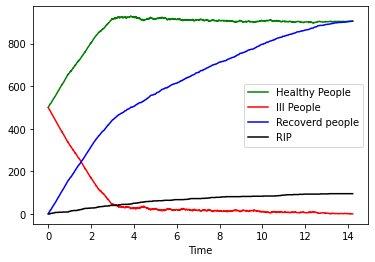

In [18]:
nepzeb.plotter('{}.csv'.format(fileName))